# Analysis of granules using Phasor

This function, `analize_with_phasor`, analyzes FLIM data using the phasor analysis approach from the napari plugin `napari_flim_phasor_plotter`.
The function processes raw FLIM data in PTU format to extract various features from segmented objects based on its intensity image. 

Here's an overview of its key functionalities:
1. **Loading Data**: Reads FLIM data from the provided file path (`data_path_1`).
2. **Channel Selection**: Selects the appropriate channel from the loaded FLIM data based on availability and metadata.
3. **Phasor Analysis**:
   - Calculates phasor components (G and S) from the selected channel.
   - Applies a time mask to remove the rising part of the exponential decay.
4. **Background Removal**: Optional step to create a space mask using a specified threshold (`threshold`).
5. **Lifetime Calculation**: Computes the phasor lifetime (tau) in picoseconds for each pixel based on G, S, and the laser frequency.
6. **Intensity Image Summation**: Generates an intensity image by summing counts across the selected channel.
7. **Segmentation**: Performs segmentation on the intensity image to identify objects of interest.
8. **Feature Extraction**: Measures features such as area, average intensity, G, S, and phasor lifetime from the segmented objects.
9. **Multichannel Image Creation**: Constructs a multichannel image containing intensity, G, S, phasor lifetime, and a labeled parameter map.
10. **Data Output**: Returns a Pandas DataFrame (`df`) with extracted features and a numpy ndarray (`report_multichannel_image`) representing the multichannel image.




## Add pakcage to python path

In [1]:
import sys
import os

# Manually set the parent directory path
notebook_dir = os.getcwd()  # This gets the current working directory of the notebook
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)

## import function

In [2]:
from flim_processing import analize_with_phasor

## Provide the path to raw data in PTU format 
since here the example data is provided, the path is relative. This should be modified according to the needs 

In [3]:
# path to ptu files
data_path_1 = r"../data/Image_phasor_example/cl1-y1_seq1.ptu"

# Print the paths to verify (optional)
#since examples are in relative path, change in folder order can cause a bug
print(f"Path to data file 1: {data_path_1}")

Path to data file 1: ../data/Image_phasor_example/cl1-y1_seq1.ptu


## Example of usage 

In [4]:
df,report_multichannel_image=analize_with_phasor(data_path_1)
df

TCSPC Hardware: PicoHarpT3
Raw Data has been Read!



,label,area,average_fluor_intensity,average_G,average_S,average_phasor_tau_ps
0,1,68.0,361.852941,0.489370,0.431278,1762.551039
1,2,50.0,214.280000,0.496318,0.429941,1738.159503
2,3,36.0,125.027778,0.497267,0.430926,1740.665555
3,4,32.0,57.437500,0.435944,0.415389,1951.483022
4,5,57.0,326.631579,0.505258,0.425168,1686.031871
5,6,61.0,151.278689,0.491019,0.419586,1723.722602
6,7,39.0,340.692308,0.505267,0.420415,1663.401157
7,8,30.0,150.500000,0.491142,0.414368,1703.891273
8,9,113.0,497.619469,0.540994,0.416310,1536.983838
9,10,41.0,204.121951,0.427473,0.436508,2052.765495


## Representation of the output image
This image contains intensity, G, S, and phasor lifetime information, as well as result of the segmentation in the form of parametric map with average lifetime value per object

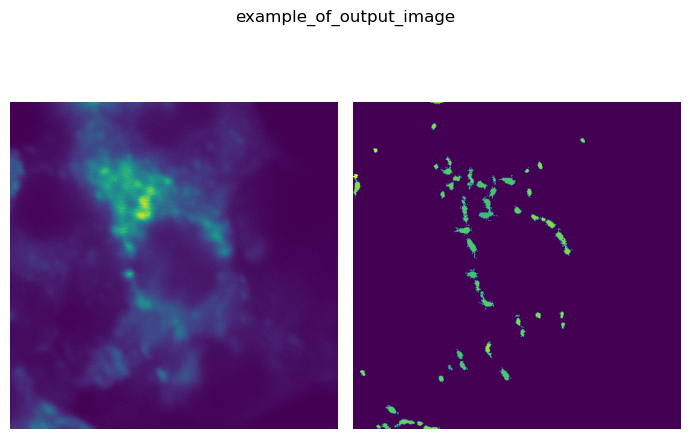

In [7]:
import matplotlib.pyplot as plt
    
fig, axes = plt.subplots(1, 2, squeeze=False, figsize=(7, 5))
#summed intensity f CFP (input image)
axes[0, 0].imshow(report_multichannel_image[:, :, 0])
axes[0, 0].axis("off")

#result of the segmentation (param map)
axes[0, 1].imshow(report_multichannel_image[:, :, 4])
axes[0, 1].axis("off")

fig.suptitle(str('example_of_output_image'))
plt.tight_layout()
#fig.savefig(output_folder_path / (image_id + '_plots.png'))
#plt.close()


## Example of the Phasor plotting
Uses G and S coordinates from the output table

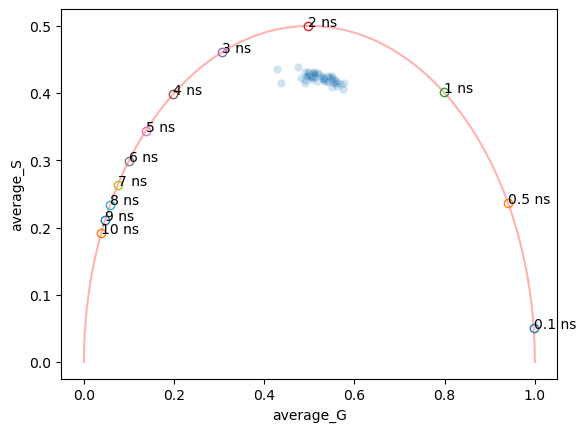

In [8]:
#plotting can move entirely tohiste data processing part 
import seaborn as sns
frequency=80 
laser_frequency=80

def add_phasor_circle(ax):
    '''
    Generate FLIM universal semi-circle plot
    '''
    import numpy as np
    angles = np.linspace(0, np.pi, 180)
    x = (np.cos(angles) + 1) / 2
    y = np.sin(angles) / 2
    ax.plot(x, y, 'red', alpha=0.3)
    return ax

def add_tau_line(ax, tau, frequency):
    '''
    Add tau lines to the phasor plot
    '''
    import numpy as np
    frequency = frequency * 1E6  # MHz to Hz
    w = 2 * np.pi * frequency  # Hz to radians/s
    tau = tau * 1E-9  # nanoseconds to seconds
    g = 1 / (1 + ((w * tau)**2))
    s = (w * tau) / (1 + ((w * tau)**2))
    dot, = ax.plot(g, s, marker='o', mfc='none')
    array = np.linspace(0, g, 50)
    y = (array * s / g)
    #ax.plot(array, y, color=dot.get_color())
    return g, s

fig, ax = plt.subplots()
sns.scatterplot(data=df, x = 'average_G', y = 'average_S', ax = ax,zorder=0.002,alpha=0.2)
add_phasor_circle(ax)

tau_list = [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for tau in tau_list:
    g, s = add_tau_line(ax, tau, laser_frequency)
    text = str(tau) + ' ns'
    plt.text(g, s, text)